In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import plotly.express as px
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
def read_data():
    data = pd.read_csv('C:/Users/Rushikesh/Desktop/Machine Learning/New Projects/CO2/CO2_Emissions.csv')
    return data

In [3]:
data = read_data()
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df = data.copy()
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.drop(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], axis = 1, inplace = True)

In [6]:
df.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [7]:
col_rename = df.rename(columns = {'Engine Size(L)' : 'Engine_size', 'Fuel Consumption City (L/100 km)' : 'Fuel_cons_city', 
                        'Fuel Consumption Hwy (L/100 km)' : 'Fuel_cons_Hwy',
                       'Fuel Consumption Comb (L/100 km)' : 'Fuel_cons_comb', 
                       'CO2 Emissions(g/km)' : 'CO2_emitted'}, inplace = True)

In [8]:
df.head()

,Engine_size,Cylinders,Fuel_cons_city,Fuel_cons_Hwy,Fuel_cons_comb,Fuel Consumption Comb (mpg),CO2_emitted
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


# EDA

In [9]:
df.shape

(7385, 7)

In [18]:
df.describe()

,Engine_size,Cylinders,Fuel_cons_city,Fuel_cons_Hwy,Fuel_cons_comb,Fuel Consumption Comb (mpg),CO2_emitted
count,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000,4360.000000
mean,3.111124,5.544954,12.464679,9.018073,10.913188,27.703211,248.982798
std,1.330996,1.814979,3.516068,2.265768,2.918367,7.415069,59.555114
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,9.900000,7.400000,8.800000,23.000000,205.000000
50%,3.000000,6.000000,12.000000,8.700000,10.500000,27.000000,244.000000
75%,3.600000,6.000000,14.400000,10.200000,12.500000,32.000000,285.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [11]:
df.isnull().sum()

Engine_size                    0
Cylinders                      0
Fuel_cons_city                 0
Fuel_cons_Hwy                  0
Fuel_cons_comb                 0
Fuel Consumption Comb (mpg)    0
CO2_emitted                    0
dtype: int64

In [12]:
df.duplicated().sum()

3025

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(4360, 7)

In [19]:
df.corr()

,Engine_size,Cylinders,Fuel_cons_city,Fuel_cons_Hwy,Fuel_cons_comb,Fuel Consumption Comb (mpg),CO2_emitted
Engine_size,1.000000,0.926963,0.822038,0.754453,0.808305,-0.744284,0.844341
Cylinders,0.926963,1.000000,0.790989,0.707700,0.771339,-0.704259,0.823752
Fuel_cons_city,0.822038,0.790989,1.000000,0.947593,0.993615,-0.927345,0.920868
Fuel_cons_Hwy,0.754453,0.707700,0.947593,1.000000,0.977283,-0.889965,0.886540
Fuel_cons_comb,0.808305,0.771339,0.993615,0.977283,1.000000,-0.925576,0.920014
Fuel Consumption Comb (mpg),-0.744284,-0.704259,-0.927345,-0.889965,-0.925576,1.000000,-0.904174
CO2_emitted,0.844341,0.823752,0.920868,0.886540,0.920014,-0.904174,1.000000


Skewness before log trans is :  0.8693127756524767
Skewness with log transformation is :  0.13258620634550541


C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_3156\200899468.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(eng_log)


<Axes: xlabel='Engine_size', ylabel='Density'>

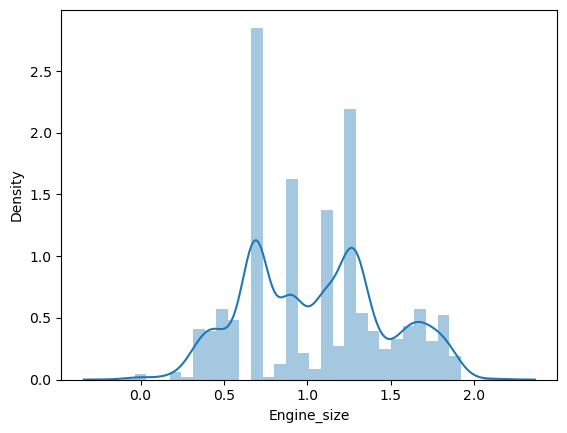

In [37]:
print("Skewness before log trans is : ", df['Engine_size'].skew())


eng_log = np.log(df['Engine_size'])
print("Skewness with log transformation is : ",eng_log.skew())
sns.distplot(eng_log)

Skewness without log transf is :  1.2071206091843405
Skewness with log transformation is :  0.5166731880364754


C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_3156\3529779599.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cyl_log)


<Axes: xlabel='Cylinders', ylabel='Density'>

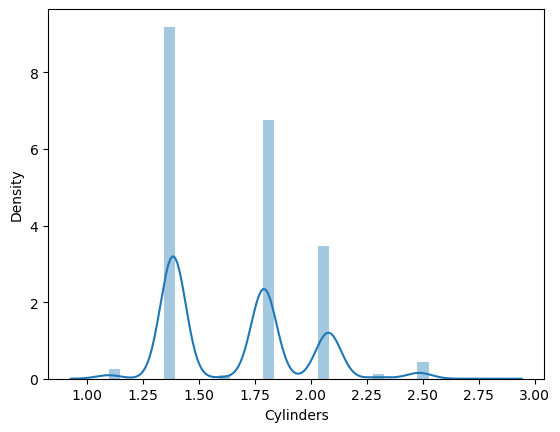

In [35]:
print("Skewness without log transf is : ", df['Cylinders'].skew())

cyl_log = np.log(df['Cylinders'])
print("Skewness with log transformation is : ",cyl_log.skew())

sns.distplot(cyl_log)

Skewness without log transformation is :  0.8688178393553213
Skewness with log transformation is :  0.011018331671378265


C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_3156\1086072972.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fuel_log)


<Axes: xlabel='Fuel_cons_comb', ylabel='Density'>

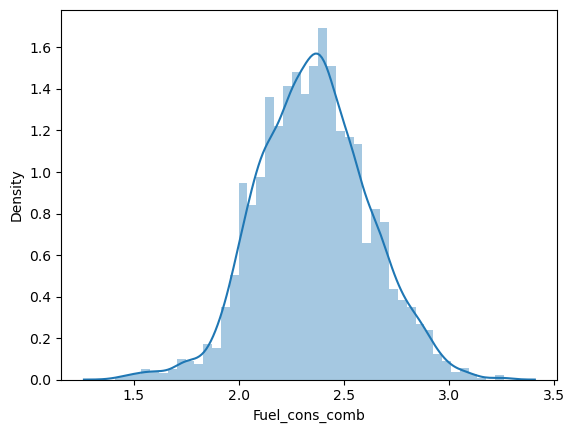

In [40]:
print("Skewness without log transformation is : ", df['Fuel_cons_comb'].skew())

fuel_log = np.log(df['Fuel_cons_comb'])
print("Skewness with log transformation is : ",fuel_log.skew())
sns.distplot(fuel_log)

Skewness without log transformation is :  0.9668138733616167
Skewness with log transformation is :  -0.010960536643991617


C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_3156\2007876412.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fuel_mpg)


<Axes: xlabel='Fuel Consumption Comb (mpg)', ylabel='Density'>

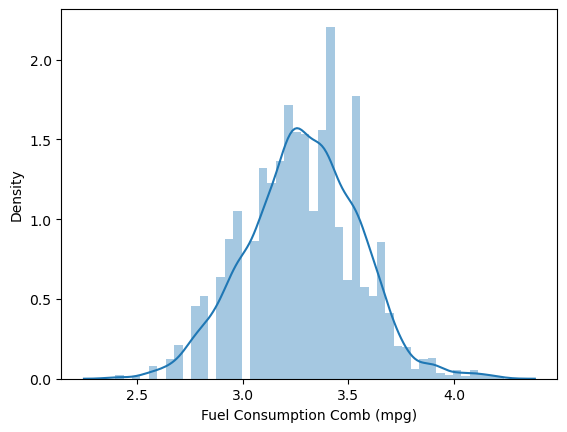

In [145]:
print("Skewness without log transformation is : ", df['Fuel Consumption Comb (mpg)'].skew())

fuel_mpg = np.log(df['Fuel Consumption Comb (mpg)'])
print("Skewness with log transformation is : ",fuel_mpg.skew())
sns.distplot(fuel_mpg)

Skewness without log transf is :  0.5572562885035485
Skewness with log transformation is :  -0.1986999837811412


C:\Users\Rushikesh\AppData\Local\Temp\ipykernel_3156\3746910882.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(co2_log)


<Axes: xlabel='CO2_emitted', ylabel='Density'>

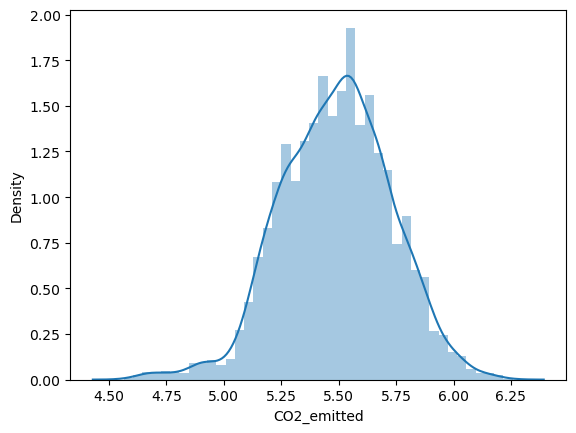

In [160]:
print("Skewness without log transf is : ", df['CO2_emitted'].skew())

co2_log = np.log(df['CO2_emitted'])
print("Skewness with log transformation is : ",co2_log.skew())

sns.distplot(co2_log)

# Outlier detection and removal or replaceent

### We can see for all the veriables, max and min values are not so much deviated from mean, so outliers will have minimal effect on the predictions

# Standardization

In [125]:
scalar = StandardScaler()
scalar

StandardScaler()

In [146]:
X = df[['Engine_size', 'Cylinders', 'Fuel_cons_comb', "Fuel Consumption Comb (mpg)"]]
Y = df['CO2_emitted']

In [147]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=1236)

In [148]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(3488, 4) (3488,)
(872, 4) (872,)


In [149]:
x_train = scalar.fit_transform(X_train)
x_test = scalar.transform(X_test)

In [150]:
print(x_train)

[[-0.82610151 -0.8479285  -0.71890027  0.57564552]
 [ 0.52019199  0.2572937  -0.105372   -0.09763313]
 [-1.42445418 -1.40053959 -1.57102287  2.32617001]
 ...
 [-0.07816068  0.2572937   0.20139214 -0.36694458]
 [-1.27486602 -0.8479285  -1.43468325  1.92220282]
 [-1.12527785 -0.8479285  -1.19608892  1.3835799 ]]


In [151]:
print(x_test)

[[-0.45213109 -0.8479285  -0.78707008  0.71030125]
 [-0.45213109 -0.8479285  -0.48030594  0.30633406]
 [-0.07816068  0.2572937  -0.1735418  -0.09763313]
 ...
 [ 0.52019199  0.2572937   0.16730724 -0.36694458]
 [-1.12527785 -0.8479285  -1.09383421  1.24892417]
 [ 2.16566184  3.57296028  1.87155244 -1.44419042]]


In [152]:
model = LinearRegression()
model

LinearRegression()

In [153]:
model_fit = model.fit(x_train, Y_train)
model_fit

LinearRegression()

In [154]:
pred_train = model_fit.predict(x_train)
pred_train

array([206.32374957, 256.14579217, 139.24103557, ..., 263.46360839,
       158.68601205, 176.65055044])

In [155]:
print("r2 score of trained model is : ", round(r2_score(pred_train, Y_train),2))

r2 score of trained model is :  0.89


In [156]:
pred_test = model_fit.predict(x_test)
pred_test

array([204.77304189, 219.72057833, 250.40762857, 260.62105007,
       259.59916062, 310.85789518, 190.8689589 , 260.62105007,
       236.41175121, 225.32128158, 222.70797797, 273.9432679 ,
       157.69802704, 257.69649984, 273.27333154, 270.13428855,
       143.02783278, 205.70555846, 257.07830874, 308.49606762,
       244.80692532, 213.50168397, 292.73003033, 240.51287388,
       176.08782776, 236.14855284, 130.2387353 , 185.37919251,
       254.40215572, 185.37919251, 171.16078405, 228.50468884,
       222.50766821, 323.29568389, 302.49166602, 207.95644915,
       239.14337266, 278.71501047, 350.83565281, 200.88637278,
       171.77897516, 211.30626171, 250.40762857, 230.30379372,
       278.65954203, 259.44013629, 255.02034682, 196.97691639,
       206.32374957, 218.53966455, 268.44612054, 142.09531621,
       265.04083954, 292.95190406, 301.15172792, 144.90892957,
       308.44059919, 248.8569209 , 216.28877386, 265.65903065,
       158.17875781, 269.68250275, 283.58658574, 305.68

In [157]:
print("r2 score of predicted test model is : ", round(r2_score(pred_test, Y_test), 2))
print("MAE is : ", round(mean_absolute_error(pred_test, Y_test),2))
print("MSE is : ", round(mean_squared_error(pred_test, Y_test),2))
print("RMSE is : ", round(sqrt(mean_squared_error(pred_test, Y_test)),2))

r2 score of predicted test model is :  0.88
MAE is :  12.2
MSE is :  376.4
RMSE is :  19.4


In [159]:
new_pred = model_fit.predict(scalar.transform([[3.5, 6, 9, 35 ]]))
new_pred

C:\Users\Rushikesh\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([219.54305584])

# Conclusion : Model is predicting with 85% accuracy with moderately skewed data. This model is fit to apply for future predictions.

# Regression plots

<Axes: xlabel='Engine_size', ylabel='CO2_emitted'>

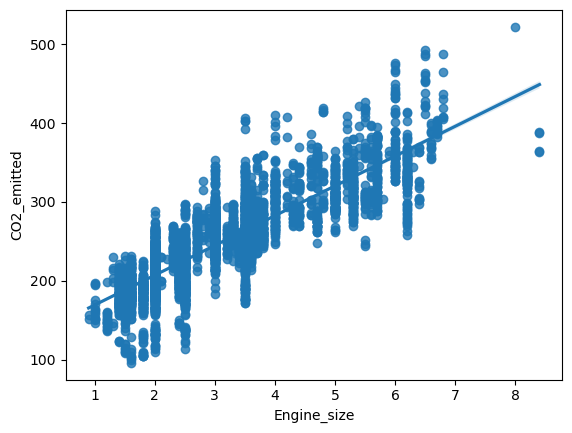

In [139]:
sns.regplot(data = df , x = 'Engine_size', y = 'CO2_emitted')

<Axes: xlabel='Cylinders', ylabel='CO2_emitted'>

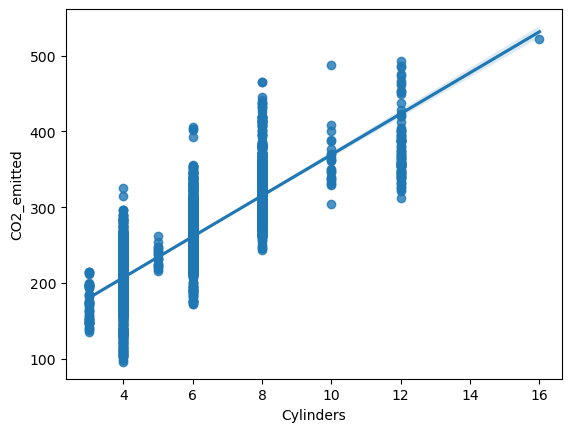

In [140]:
sns.regplot(data = df, x = 'Cylinders', y = 'CO2_emitted')

<Axes: xlabel='Fuel_cons_comb', ylabel='CO2_emitted'>

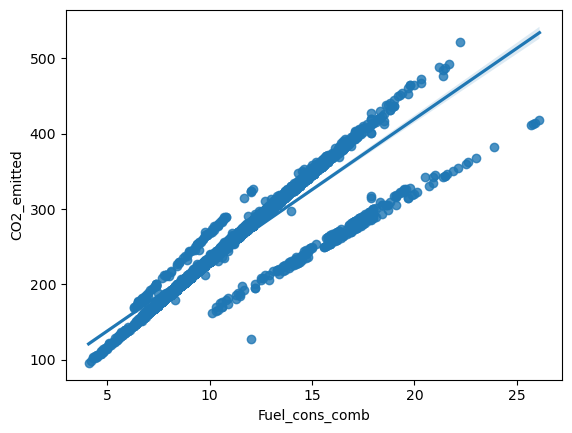

In [141]:
sns.regplot(data = df, x = 'Fuel_cons_comb', y = "CO2_emitted")

# With 3 features without log transformation : Engine_size, Cylinders and Fuel_cons_comn r2 score was 85%

# With 4 features without log transformation : Engine_size, Cylinders, Fuel_cons_comn and Fuel Consumption Comb (mpg) lets check r2 score : 88%